# Improving Explainability of Environmental Traits

As Julie described, the environmental traits are correlated. In past work, she found that they could be easily interpretable as PCs, each axis describing some element of the environment important for plants. As such, I will use the PCs in the ML model versus the raw traits. I will also make sure that the plan traits are not too correlated (>0.7).

## Table of Contents
* Extracting Principle Components for Environmental Traits
* Safeguarding against multicollinearity in Plant Traits
* Conclusion

##  Extracting Principle Components for Environmental Traits

In [1]:
RGR_MSH <- data.frame(read.csv("C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/RGR_MSH.csv"))[,-1]
RGR_MSH_NA <- data.frame(read.csv("C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/RGR_MSH_NA.csv"))[,-1]
labels <- data.frame(read.csv("C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/labels.csv"))
source("C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/scripts/archive/1. functions.R")

In [2]:
environ_variables <- labels$Feature[which(labels$Class==2)]
environ_name <- which(colnames(RGR_MSH_NA)%in%environ_variables)

plant_variables <- labels$Feature[which(labels$Class==1)]
plant_name <- which(colnames(RGR_MSH_NA)%in%plant_variables)

In [3]:
library(factoextra)
library(ggplot2)
require(ggrepel)
suppressMessages(extrafont::loadfonts(device="win"))
rgr_na.pca <- prcomp(na.omit(RGR_MSH_NA[,environ_name]),
                                center = TRUE, scale =TRUE)
# export eginvectors data
TW_G_Plot_NA<- data.frame(apply(data.frame(get_pca_ind(rgr_na.pca)$coord), 2, scale))
# save the column names as metric names
colnames(TW_G_Plot_NA) <- colnames(rgr_na.pca$x)
# export site coordinates
TW_G_Plot_VC_NA<- data.frame(get_pca_var(rgr_na.pca)$coord)
# save names
colnames(TW_G_Plot_VC_NA) <- colnames(rgr_na.pca$x)

# make the mertic names a column
TW_G_Plot_VC_NA$Feature <- rownames(TW_G_Plot_VC_NA)
# order
TW_G_Plot_VC_NA$Order <- 1:nrow(TW_G_Plot_VC_NA)
# add metric labels for plotting
TW_G_Plot_VC_NA <- merge(TW_G_Plot_VC_NA,labels,
                      by = "Feature")
# ensure we have the correct order
TW_G_Plot_VC_NA <- TW_G_Plot_VC_NA[order(TW_G_Plot_VC_NA$Order),]

rg_na.eigen <-  get_eigenvalue(rgr_na.pca)


Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Loading required package: ggrepel
Warning message:
"package 'ggrepel' was built under R version 3.6.3"

In [4]:
rgr.pca <- prcomp(RGR_MSH[,environ_name],
                                center = TRUE, scale =TRUE)
# export eginvectors data
TW_G_Plot<- data.frame(apply(data.frame(get_pca_ind(rgr.pca)$coord), 2, scale))
# save the column names as metric names
colnames(TW_G_Plot) <- colnames(rgr.pca$x)
# export site coordinates
TW_G_Plot_VC<- data.frame(get_pca_var(rgr.pca)$coord)
# save names
colnames(TW_G_Plot_VC) <- colnames(rgr.pca$x)

# fliping axes to make sure the match the base PCA 
TW_G_Plot_VC$PC6 <- TW_G_Plot_VC$PC6*-1
TW_G_Plot$PC6 <- TW_G_Plot$PC6*-1

TW_G_Plot_VC$PC5 <- TW_G_Plot_VC$PC5*-1
TW_G_Plot$PC5 <- TW_G_Plot$PC5*-1

TW_G_Plot_VC$PC4 <- TW_G_Plot_VC$PC4*-1
TW_G_Plot$PC4 <- TW_G_Plot$PC4*-1

# make the mertic names a column
TW_G_Plot_VC$Feature <- rownames(TW_G_Plot_VC)
# order
TW_G_Plot_VC$Order <- 1:nrow(TW_G_Plot_VC)
# add metric labels for plotting
TW_G_Plot_VC <- merge(TW_G_Plot_VC,labels,
                      by = "Feature")
# ensure we have the correct order
TW_G_Plot_VC <- TW_G_Plot_VC[order(TW_G_Plot_VC$Order),]

rg.eigen <-  get_eigenvalue(rgr.pca)

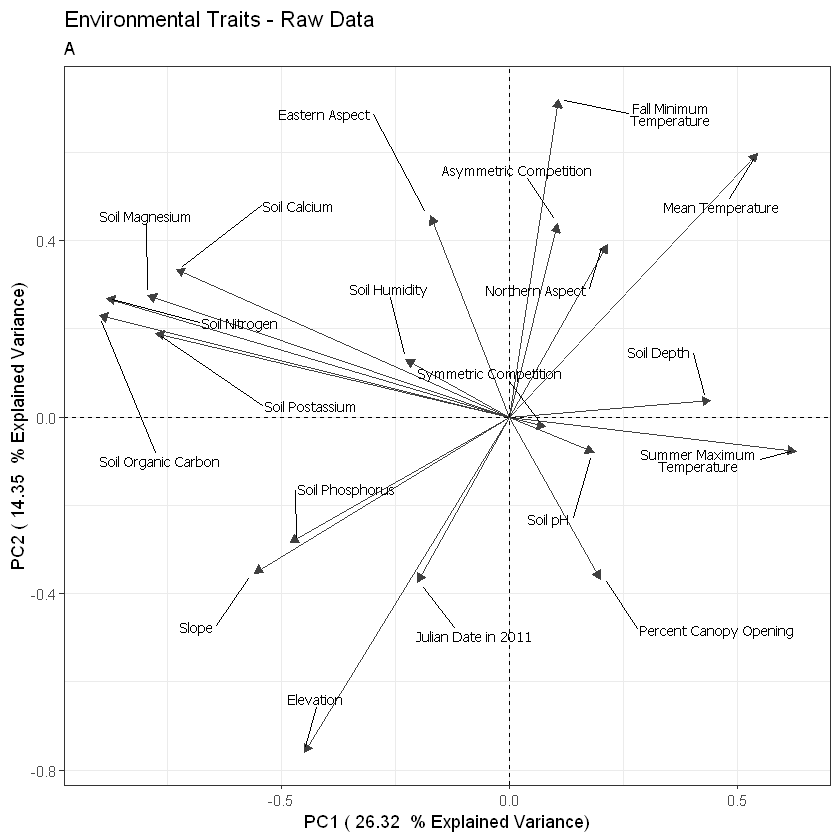

In [5]:
# plot PCA #
ggplot(data = TW_G_Plot_NA, aes(x = PC1, y = PC2))+                                   
geom_segment(data=TW_G_Plot_VC_NA,aes(x=0,xend = PC1, y=0, yend = PC2),
               arrow = arrow(length = unit(0.2, "cm"),
                             type="closed"),size = 0.5,color = "grey25",inherit.aes=TRUE)+
geom_text_repel(data=TW_G_Plot_VC_NA,
                  aes(x = PC1, y = PC2,label= stringr::str_wrap(Label,23)), lineheight = 0.7, size = 3,
                  box.padding = unit(1.5, "lines"),
                  point.padding = unit(0.5, "lines"), family = "Tahoma")+
geom_vline(xintercept = 0, linetype = "dashed")+
geom_hline(yintercept = 0, linetype = "dashed")+
labs(title = "Environmental Traits - Raw Data  ",
       subtitle  = LETTERS[1])+ #title
xlab(paste("PC1 (", round(rg_na.eigen$variance.percent[1], 2), " % Explained Variance)")) +
ylab(paste("PC2 (", round(rg_na.eigen$variance.percent[2], 2), " % Explained Variance)")) +
theme_bw()

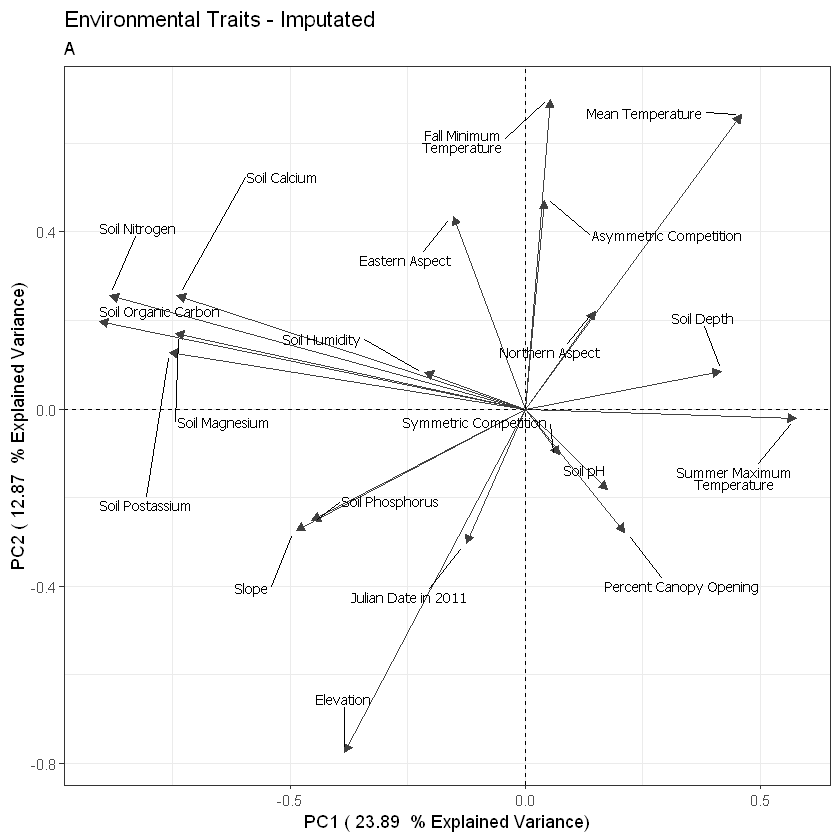

In [6]:
# plot PCA #
ggplot(data = TW_G_Plot, aes(x = PC1, y = PC2))+                                   
geom_segment(data=TW_G_Plot_VC,aes(x=0,xend = PC1, y=0, yend = PC2),
               arrow = arrow(length = unit(0.2, "cm"),
                             type="closed"),size = 0.5,color = "grey25",inherit.aes=TRUE)+
geom_text_repel(data=TW_G_Plot_VC,
                  aes(x = PC1, y = PC2,label= stringr::str_wrap(Label,23)), lineheight = 0.7, size = 3,
                  box.padding = unit(1.5, "lines"),
                  point.padding = unit(0.5, "lines"), family = "Tahoma")+
geom_vline(xintercept = 0, linetype = "dashed")+
geom_hline(yintercept = 0, linetype = "dashed")+
labs(title = "Environmental Traits - Imputated  ",
       subtitle  = LETTERS[1])+ #title
xlab(paste("PC1 (", round(rg.eigen$variance.percent[1], 2), " % Explained Variance)")) +
ylab(paste("PC2 (", round(rg.eigen$variance.percent[2], 2), " % Explained Variance)")) +
theme_bw()

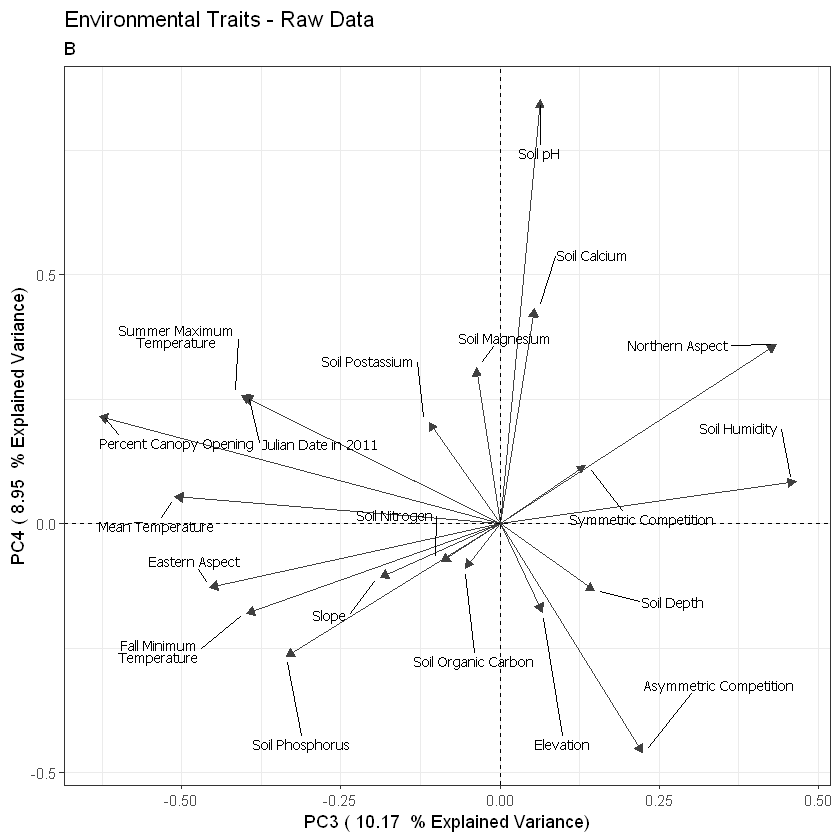

In [7]:
# plot PCA #
ggplot(data = TW_G_Plot_NA, aes(x = PC3, y = PC4))+                                   
geom_segment(data=TW_G_Plot_VC_NA,aes(x=0,xend = PC3, y=0, yend = PC4),
               arrow = arrow(length = unit(0.2, "cm"),
                             type="closed"),size = 0.5,color = "grey25",inherit.aes=TRUE)+
geom_text_repel(data=TW_G_Plot_VC_NA,
                  aes(x = PC3, y = PC4,label= stringr::str_wrap(Label,23)), lineheight = 0.7, size = 3,
                  box.padding = unit(1.5, "lines"),
                  point.padding = unit(0.5, "lines"), family = "Tahoma")+
geom_vline(xintercept = 0, linetype = "dashed")+
geom_hline(yintercept = 0, linetype = "dashed")+
labs(title = "Environmental Traits - Raw Data ",
       subtitle  = LETTERS[2])+ #title
xlab(paste("PC3 (", round(rg_na.eigen$variance.percent[3], 2), " % Explained Variance)")) +
ylab(paste("PC4 (", round(rg_na.eigen$variance.percent[4], 2), " % Explained Variance)")) +
theme_bw()

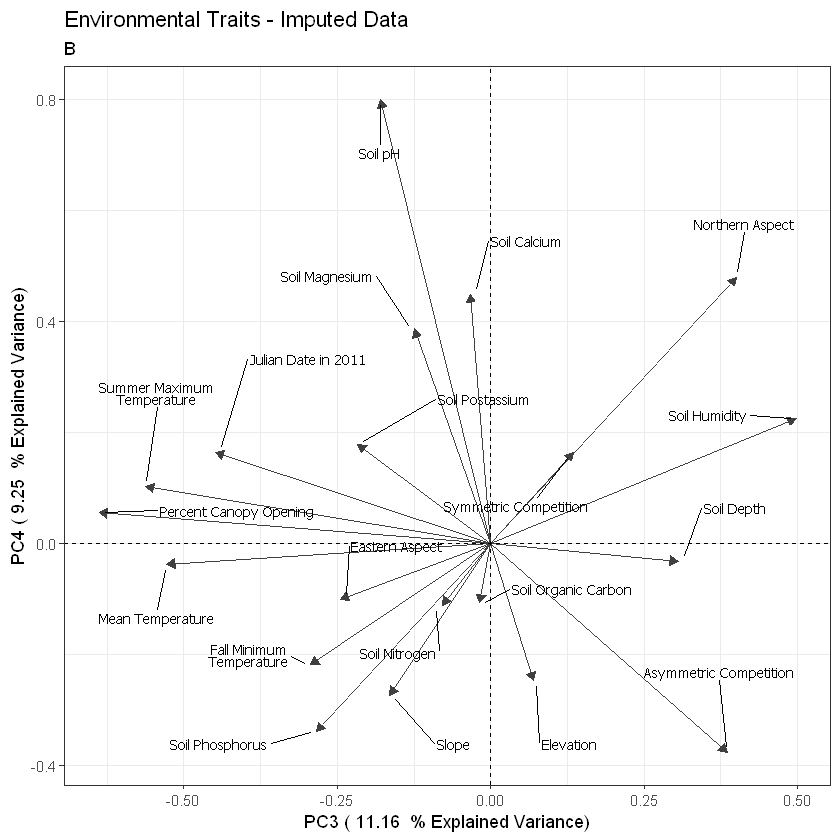

In [8]:
# plot PCA #
ggplot(data = TW_G_Plot, aes(x = PC3, y = PC4))+                                   
geom_segment(data=TW_G_Plot_VC,aes(x=0,xend = PC3, y=0, yend = PC4),
               arrow = arrow(length = unit(0.2, "cm"),
                             type="closed"),size = 0.5,color = "grey25",inherit.aes=TRUE)+
geom_text_repel(data=TW_G_Plot_VC,
                  aes(x = PC3, y = PC4,label= stringr::str_wrap(Label,23)), lineheight = 0.7, size = 3,
                  box.padding = unit(1.5, "lines"),
                  point.padding = unit(0.5, "lines"), family = "Tahoma")+
geom_vline(xintercept = 0, linetype = "dashed")+
geom_hline(yintercept = 0, linetype = "dashed")+
labs(title = "Environmental Traits - Imputed Data ",
       subtitle  = LETTERS[2])+ #title
xlab(paste("PC3 (", round(rg.eigen$variance.percent[3], 2), " % Explained Variance)")) +
ylab(paste("PC4 (", round(rg.eigen$variance.percent[4], 2), " % Explained Variance)")) +
theme_bw()

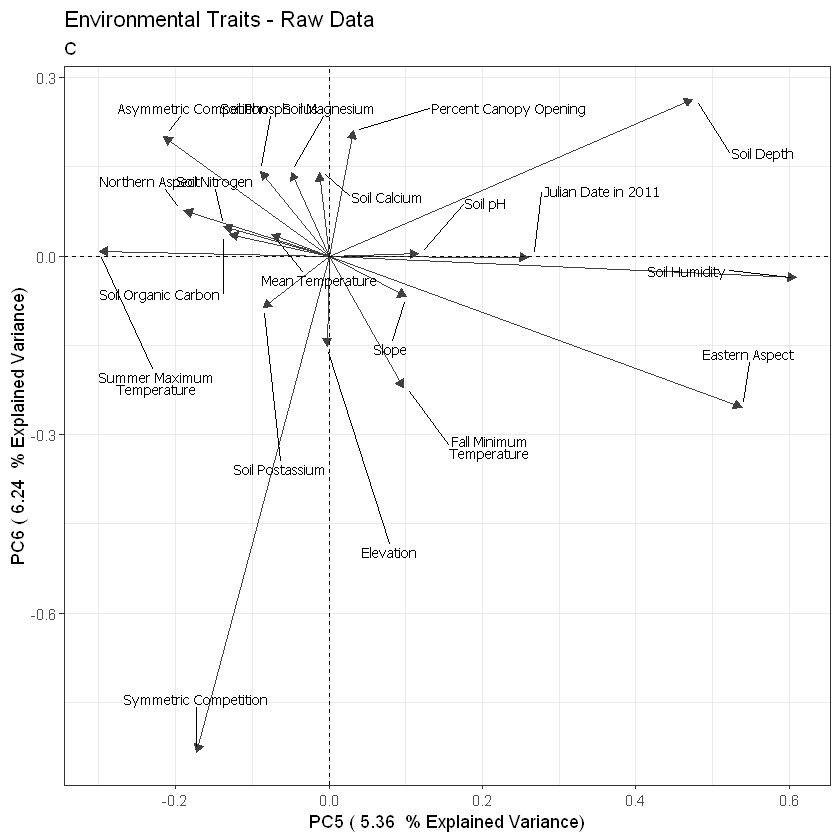

In [9]:
# plot PCA #
ggplot(data = TW_G_Plot_NA, aes(x = PC5, y = PC6))+                                   
geom_segment(data=TW_G_Plot_VC_NA,aes(x=0,xend = PC5, y=0, yend = PC6),
               arrow = arrow(length = unit(0.2, "cm"),
                             type="closed"),size = 0.5,color = "grey25",inherit.aes=TRUE)+
geom_text_repel(data=TW_G_Plot_VC_NA,
                  aes(x = PC5, y = PC6,label= stringr::str_wrap(Label,23)), lineheight = 0.7, size = 3,
                  box.padding = unit(1.5, "lines"),
                  point.padding = unit(0.5, "lines"), family = "Tahoma")+
geom_vline(xintercept = 0, linetype = "dashed")+
geom_hline(yintercept = 0, linetype = "dashed")+
labs(title = "Environmental Traits - Raw Data ",
       subtitle  = LETTERS[3])+ #title
xlab(paste("PC5 (", round(rg_na.eigen$variance.percent[6], 2), " % Explained Variance)")) +
ylab(paste("PC6 (", round(rg_na.eigen$variance.percent[5], 2), " % Explained Variance)")) +
theme_bw()

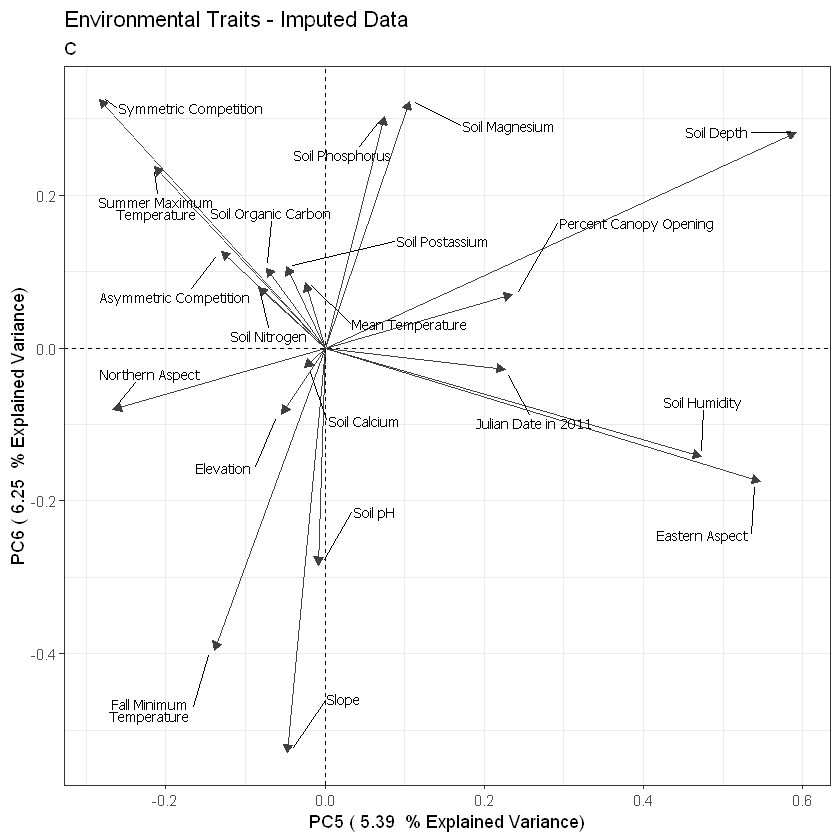

In [10]:
# plot PCA #
ggplot(data = TW_G_Plot, aes(x = PC5, y = PC6))+                                   
geom_segment(data=TW_G_Plot_VC,aes(x=0,xend = PC5, y=0, yend = PC6),
               arrow = arrow(length = unit(0.2, "cm"),
                             type="closed"),size = 0.5,color = "grey25",inherit.aes=TRUE)+
geom_text_repel(data=TW_G_Plot_VC,
                  aes(x = PC5, y = PC6,label= stringr::str_wrap(Label,23)), lineheight = 0.7, size = 3,
                  box.padding = unit(1.5, "lines"),
                  point.padding = unit(0.5, "lines"), family = "Tahoma")+
geom_vline(xintercept = 0, linetype = "dashed")+
geom_hline(yintercept = 0, linetype = "dashed")+
labs(title = "Environmental Traits - Imputed Data ",
       subtitle  = LETTERS[3])+ #title
xlab(paste("PC5 (", round(rg.eigen$variance.percent[6], 2), " % Explained Variance)")) +
ylab(paste("PC6 (", round(rg.eigen$variance.percent[5], 2), " % Explained Variance)")) +
theme_bw()

In [11]:
# now for correlation assessments, but need to rename PCs based on what they represent
TW_G_Plot_NA <- TW_G_Plot_NA[,1:6]
pca_env <- c("Soil.Fertility", "Light", "Temperature", "pH", "Soil.Humidity.Depth ", "Slope_Phosphorus")
colnames(TW_G_Plot_NA) <- pca_env

TW_G_Plot <- TW_G_Plot[,1:6]
colnames(TW_G_Plot) <- pca_env

In [12]:
# which rows are ommitted from the PCA because there are NAs?
which.g <- which(RGR_MSH_NA$SampleID%in%na.omit(RGR_MSH_NA[,c(1,environ_name)])$SampleID)
TW_G_Plot_NA$SampleID <- RGR_MSH_NA$SampleID[which.g]
RGR_MSH_NA_PCA<- merge(RGR_MSH_NA, TW_G_Plot_NA, by = "SampleID")
RGR_MSH_PCA <- data.frame(RGR_MSH[,-environ_name], TW_G_Plot)

## Correlation on Plant Traits

I want to ensure that the plant traits are not correlated. Julie said that past work suggests that they are not easily represented using a PCA. So, I will not use the this feature reduction method. 

In [13]:
library(corrplot)
library(RColorBrewer)

plant_name <- which(colnames(RGR_MSH_PCA)%in%plant_variables)
plant_name_na <- which(colnames(RGR_MSH_NA_PCA)%in%plant_variables)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


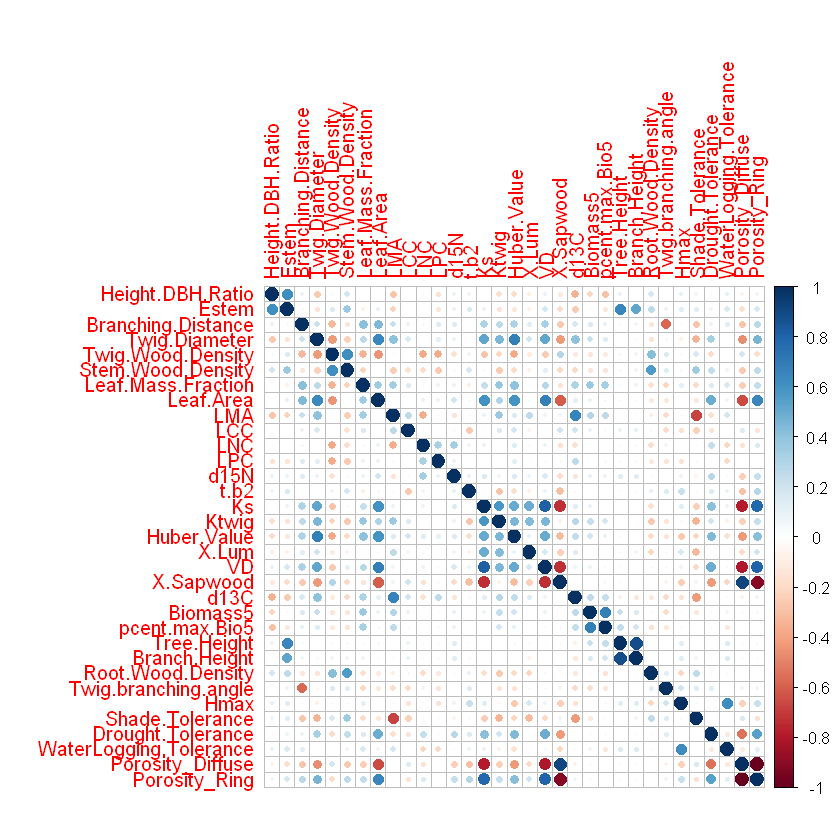

In [14]:
corrplot(cor(RGR_MSH_PCA[,plant_name]))

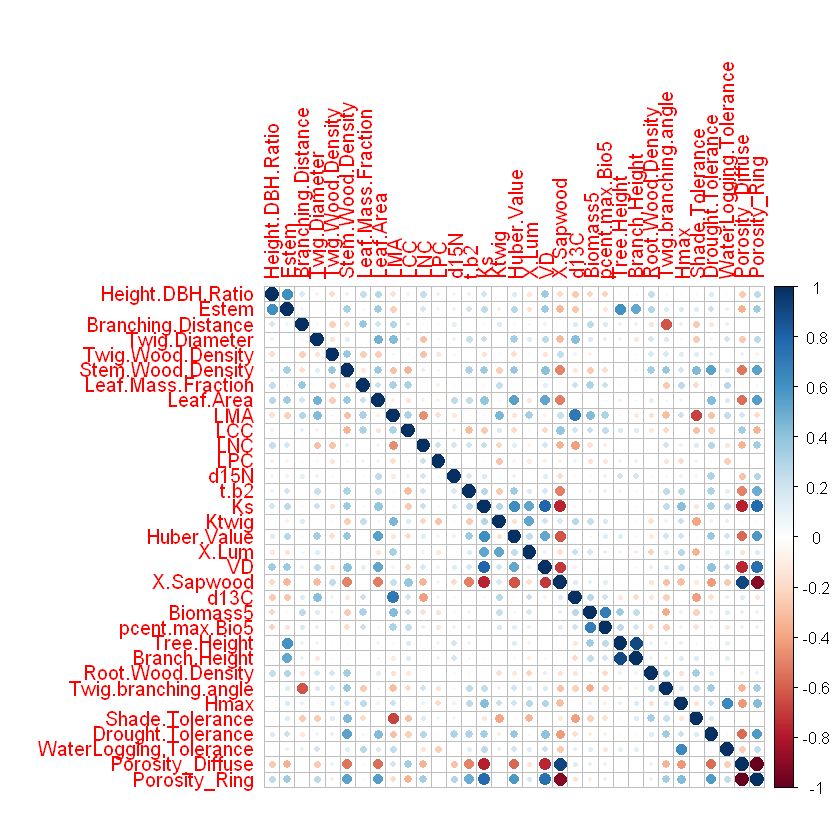

In [15]:
corrplot(cor(na.omit(RGR_MSH_NA_PCA[,plant_name_na])))

I'll keep each of the plant traits. I should not have included the porosity traits anyway. 

In [16]:
# now pulling what we need for final model building
environ_name <- which(colnames(RGR_MSH_PCA)%in%pca_env)
environ_name_na <- which(colnames(RGR_MSH_NA_PCA)%in%pca_env)

predictors_name <- which(colnames(RGR_MSH)%in% c("BAI_GR", "BIO_GR"))
predictors_name_na <- which(colnames(RGR_MSH_NA)%in% c("BAI_GR", "BIO_GR"))

In [17]:
RGR_MSH_PCA_FINAL_NA <- data.frame(RGR_MSH_NA[which.g, predictors_name_na],
                                   RGR_MSH_NA_PCA[,plant_name_na], 
                                   RGR_MSH_NA_PCA[,environ_name_na])
row.names(RGR_MSH_PCA_FINAL_NA) <- RGR_MSH_NA_PCA$SampleID

RGR_MSH_PCA_FINAL <- data.frame(RGR_MSH[, predictors_name], RGR_MSH_PCA[,plant_name], RGR_MSH_PCA[,environ_name])
row.names(RGR_MSH_PCA_FINAL) <- RGR_MSH_PCA$SampleID

In [18]:
set.seed(145)
train.test <- which(row.names(RGR_MSH_PCA_FINAL)%in%sample(rownames(RGR_MSH_PCA_FINAL), 
                                                           round(nrow(RGR_MSH_PCA_FINAL)*0.7)))

set.seed(145)
train.test_na <- which(row.names(RGR_MSH_PCA_FINAL_NA)%in%sample(rownames(RGR_MSH_PCA_FINAL_NA), 
                                                                 round(nrow(RGR_MSH_PCA_FINAL_NA)*0.7)))

rgr.msh.train <- RGR_MSH_PCA_FINAL[train.test,]
rgr.msh.test <- RGR_MSH_PCA_FINAL[-train.test,]

rgr.msh.train_na <- RGR_MSH_PCA_FINAL_NA[train.test_na,]
rgr.msh.test_na <- RGR_MSH_PCA_FINAL_NA[-train.test_na,]

write.csv(rgr.msh.train,"C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/rgr_msh_train.csv")
write.csv(rgr.msh.test,"C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/rgr_msh_test.csv")


write.csv(rgr.msh.train_na,"C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/rgr_msh_train_na.csv")
write.csv(rgr.msh.test_na,"C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/rgr_msh_test_na.csv")

## Conclusion

I did not drop any plant traits, but I now have environmental traits summarized as needed. 